In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [11]:
# 正例点和负例点
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])

# 创建SVM分类器对象
clf = svm.SVC(kernel='linear', C=float('inf'))

# 训练模型
clf.fit(X, y)

# 获取法向量w和截距b
w = clf.coef_[0]
b = clf.intercept_[0]

# 求解间隔边界
margin = 2 / np.linalg.norm(w)
boundary_1 = -w / np.linalg.norm(w) + b
boundary_2 = w / np.linalg.norm(w) + b

# 获取支持向量
support_vectors = clf.support_vectors_

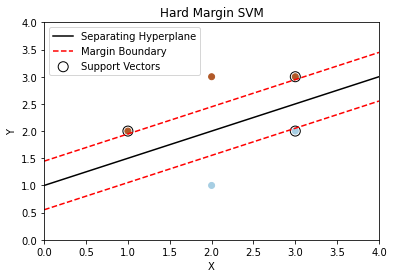

In [12]:
# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制分离超平面和间隔边界
x_vals = np.linspace(0, 4, 100)
y_vals = -w[0] / w[1] * x_vals - b / w[1]
upper_margin = y_vals + 1 / np.linalg.norm(w)
lower_margin = y_vals - 1 / np.linalg.norm(w)
plt.plot(x_vals, y_vals, 'k-', label='Separating Hyperplane')
plt.plot(x_vals, upper_margin, 'r--', label='Margin Boundary')
plt.plot(x_vals, lower_margin, 'r--')

# 绘制支持向量
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Hard Margin SVM')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()